## Homework 4: Neural Networks for Dynamical Systems
DUE: Wednesday, June 10, 2020

In [80]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import rcParams

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

### Download the accompanying ZIP file which includes MATLAB code for solving (i) A reaction-diffusion system of equations, and (ii) The Kuramoto-Sivashinsky (KS) equation.

### 1. Train a NN that can advance the solution from t to t + ∆t for the KS equation


Define KS equation

Define Stochastic Gradient Descent Neural Network

Advance the solution

### 2. Compare your evolution trajectories for your NN against using the ODE time-stepper provided with different initial conditions

Advance KS with ODE and compare to NN output

### 3. For the reaction-diffusion system, first project to a low-dimensional subspace via the SVD and see how forecasting works in the low-rank variables.

Define reaction-diffusion system equation

In [ ]:
def reaction_diffusion_rhs(t,uvt,dummy,K22,d1,d2,beta,n,N):
    
    ut = uvt[0:N].reshape(n,n)
    vt = uvt[N+1:2*N].reshape(n,n)
    u  = np.real(np.fft.ifft2(ut))
    v  = np.real(np.fft.ifft2(vt))
    
    u3  = u**3
    v3  = v**3
    u2v = u**2 @ v
    uv2 = u @ v**2
    utrhs = (fft2(u-u3-uv2+beta*u2v+beta*v3)).reshape(N,1)
    vtrhs = (fft2(v-u2v-v3-beta*u3-beta*uv2)).reshape(N,1)
    
    rhs   = [-d1*K22 @ uvt[0:N]+utrhs -d2*K22 @ uvt[N+1:] + vtrhs]
    
    return rhs

# Translated from MATLAB code:
    
# function rhs=reaction_diffusion_rhs(t,uvt,dummy,K22,d1,d2,beta,n,N);

# % Calculate u and v terms
# ut=reshape((uvt(1:N)),n,n);
# vt=reshape((uvt((N+1):(2*N))),n,n);
# u=real(ifft2(ut)); v=real(ifft2(vt));

# % Reaction Terms
# u3=u.^3; v3=v.^3; u2v=(u.^2).*v; uv2=u.*(v.^2);
# utrhs=reshape((fft2(u-u3-uv2+beta*u2v+beta*v3)),N,1);
# vtrhs=reshape((fft2(v-u2v-v3-beta*u3-beta*uv2)),N,1);

# rhs=[-d1*K22.*uvt(1:N)+utrhs
#      -d2*K22.*uvt(N+1:end)+vtrhs];


Validation

In [11]:
np.arange?

In [14]:
t = np.arange(0,10,0.05)
d1=0.1
d2=0.1
beta=1.0
L=20
n=512
N=n*n

In [16]:
np.linspace?

In [21]:
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
y=x
kx=(2*pi/L)*np.array([[0:(n/2-1)], [-n/2:-1]])
ky=kx

SyntaxError: invalid syntax (<ipython-input-21-713540f3a230>, line 4)

In [ ]:
0.314 * [0:255 -256:-1]

In [25]:
-n/2

-256.0

In [7]:




# Translated from MATLAB code

# clear all; close all; clc

# % lambda-omega reaction-diffusion system
# %  u_t = lam(A) u - ome(A) v + d1*(u_xx + u_yy) = 0
# %  v_t = ome(A) u + lam(A) v + d2*(v_xx + v_yy) = 0
# %
# %  A^2 = u^2 + v^2 and
# %  lam(A) = 1 - A^2
# %  ome(A) = -beta*A^2


# t=0:0.05:10;
# d1=0.1; d2=0.1; beta=1.0;
# L=20; n=512; N=n*n;
# x2=linspace(-L/2,L/2,n+1); x=x2(1:n); y=x;
# kx=(2*pi/L)*[0:(n/2-1) -n/2:-1]; ky=kx;

# % INITIAL CONDITIONS

# [X,Y]=meshgrid(x,y);
# [KX,KY]=meshgrid(kx,ky);
# K2=KX.^2+KY.^2; K22=reshape(K2,N,1);

# m=1; % number of spirals

# u = zeros(length(x),length(y),length(t));
# v = zeros(length(x),length(y),length(t));

# u(:,:,1)=tanh(sqrt(X.^2+Y.^2)).*cos(m*angle(X+i*Y)-(sqrt(X.^2+Y.^2)));
# v(:,:,1)=tanh(sqrt(X.^2+Y.^2)).*sin(m*angle(X+i*Y)-(sqrt(X.^2+Y.^2)));

# % REACTION-DIFFUSION
# uvt=[reshape(fft2(u(:,:,1)),1,N) reshape(fft2(v(:,:,1)),1,N)].';
# [t,uvsol]=ode45('reaction_diffusion_rhs',t,uvt,[],K22,d1,d2,beta,n,N);


# for j=1:length(t)-1
# ut=reshape((uvsol(j,1:N).'),n,n);
# vt=reshape((uvsol(j,(N+1):(2*N)).'),n,n);
# u(:,:,j+1)=real(ifft2(ut));
# v(:,:,j+1)=real(ifft2(vt));

# figure(1)
# pcolor(x,y,v(:,:,j+1)); shading interp; colormap(hot); colorbar; drawnow; 
# end

# save('reaction_diffusion_big.mat','t','x','y','u','v')

# %%
# load reaction_diffusion_big
# pcolor(x,y,u(:,:,end)); shading interp; colormap(hot)

SVD and forecast

Compare to ODE and NN on SVD forecast

### For the Lorenz equations (code given out previously in class emails), consider the following.
### 1. Train a NN to advance the solution from t to t+∆t for ρ=10, 28 and 40. Now see how well your NN works for future state prediction for ρ = 17 and ρ = 35.

Define Lorenz equations

In [65]:
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [82]:
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
x0 = (0,1,20)

Simulate the Lorenz System

In [83]:
rho = 10

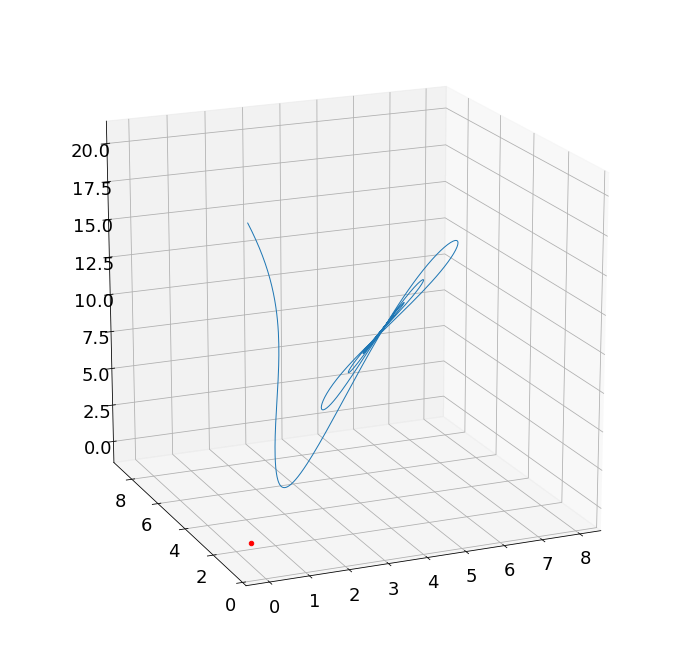

In [84]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
x_t = integrate.odeint(lorenz_deriv, 
                       x0, 
                       t,
                       args=(sigma,beta,rho),
                       rtol=10**(-12), 
                       atol=10**(-12)*np.ones_like(x0))

x, y, z = x_t.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [85]:
rho = 28

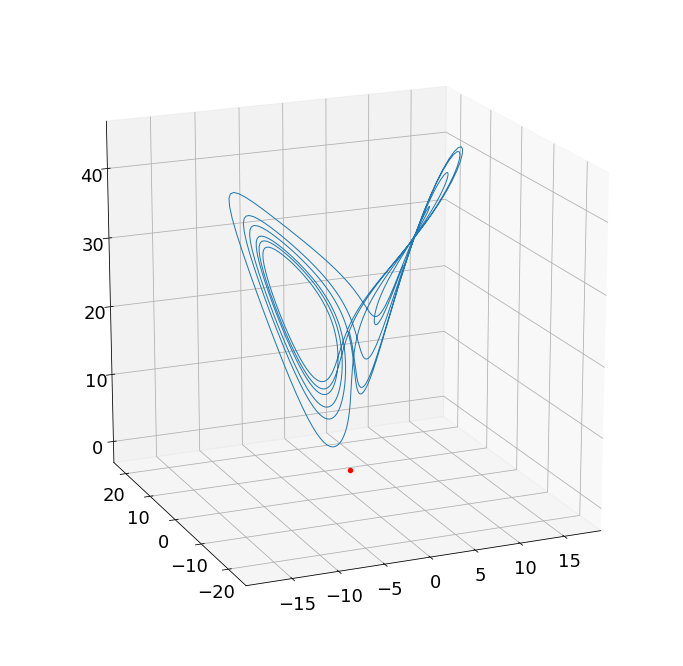

In [86]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
x_t = integrate.odeint(lorenz_deriv, 
                       x0, 
                       t,
                       args=(sigma,beta,rho),
                       rtol=10**(-12), 
                       atol=10**(-12)*np.ones_like(x0))


x, y, z = x_t.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [87]:
rho = 40

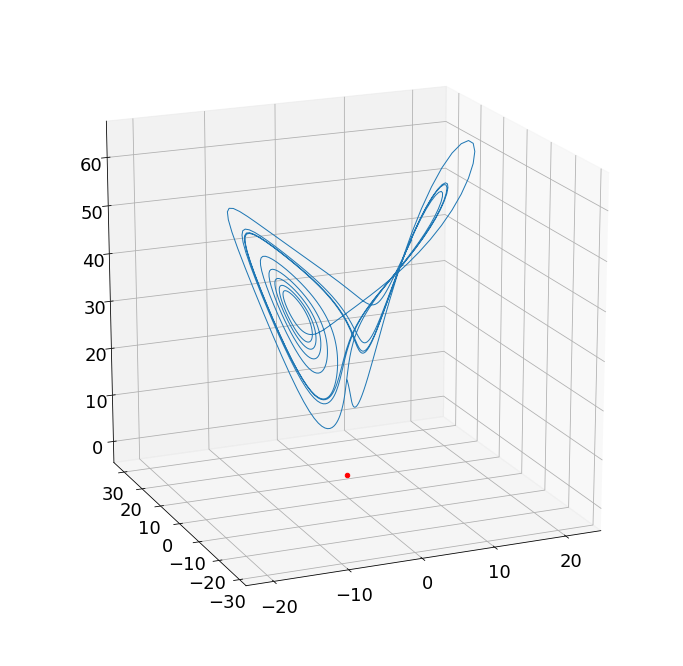

In [88]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
x_t = integrate.odeint(lorenz_deriv, 
                       x0, 
                       t,
                       args=(sigma,beta,rho),
                       rtol=10**(-12), 
                       atol=10**(-12)*np.ones_like(x0))
x, y, z = x_t.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

Define Stochastic Gradient Descent Neural Network

In [92]:
nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

In [93]:
model = Sequential()

In [94]:
#add model layers
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3))

sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.fit(nn_input, nn_output, epochs=10)

Epoch 1/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0000e+00
Epoch 2/10
80000/80000 [==============================] - 2s 25us/step - loss: 0.0000e+00
Epoch 3/10
80000/80000 [==============================] - 2s 25us/step - loss: 0.0000e+00
Epoch 4/10
80000/80000 [==============================] - 2s 26us/step - loss: 0.0000e+00
Epoch 5/10
80000/80000 [==============================] - 2s 25us/step - loss: 0.0000e+00
Epoch 6/10
80000/80000 [==============================] - 2s 29us/step - loss: 0.0000e+00
Epoch 7/10
80000/80000 [==============================] - 2s 28us/step - loss: 0.0000e+00
Epoch 8/10
80000/80000 [==============================] - 2s 26us/step - loss: 0.0000e+00
Epoch 9/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0000e+00
Epoch 10/10
80000/80000 [==============================] - 2s 28us/step - loss: 0.0000e+00


Advance the solution

In [98]:
a = model.predict(nn_output)

In [102]:
a.shape

(80000, 3)

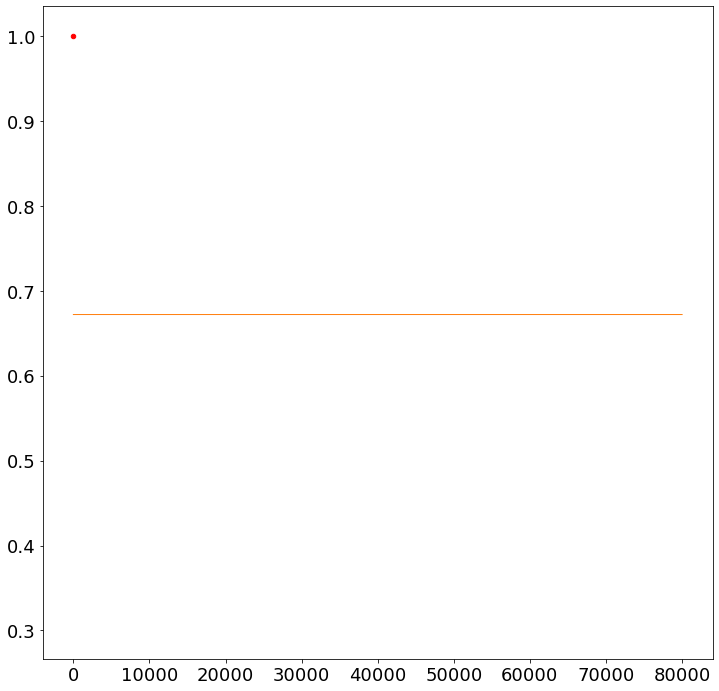

In [101]:
x, y, z = a.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

Evaluate future predictions

### 2. See if you can train your NN to identify (for ρ = 28) when a transition from one lobe to another is imminent. Determine how far in advance you can make this prediction. (NOTE: you will have to label the transitions in a test set in order to do this task)

## Scrap

### Lorenz

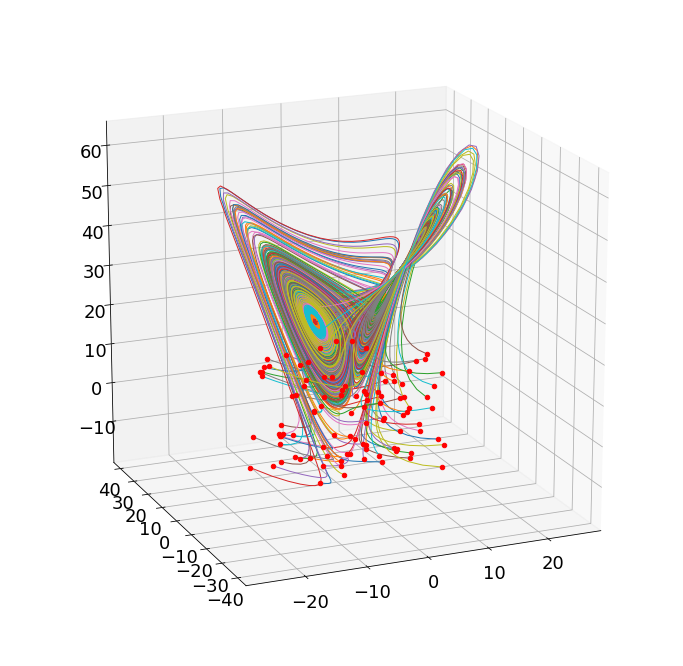

In [34]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

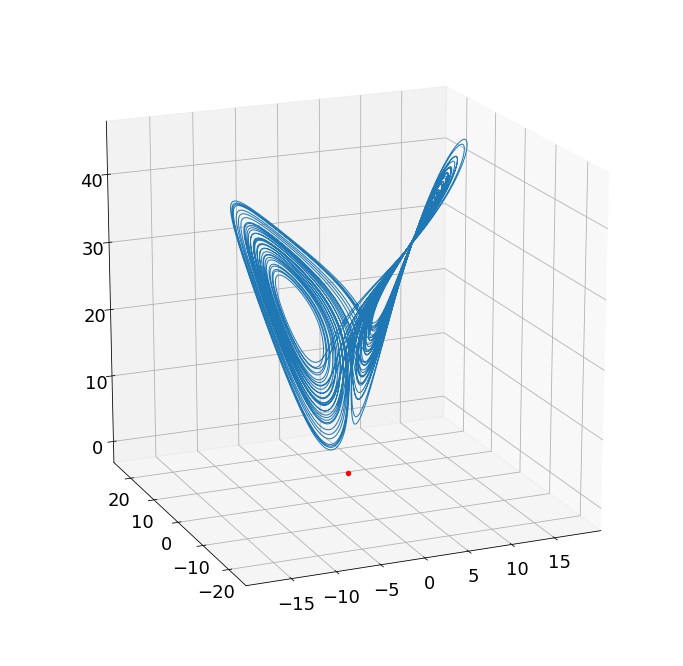

In [35]:
## Simulate the Lorenz System

dt = 0.001
T = 50
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = (0,1,20)

x_t = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

x, y, z = x_t.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

### Kuramoto-Sivashinsky

In [2]:
# clear all; close all; clc

# % Kuramoto-Sivashinsky equation (from Trefethen)
# % u_t = -u*u_x - u_xx - u_xxxx,  periodic BCs 

# N = 1024;
# x = 32*pi*(1:N)'/N;
# u = cos(x/16).*(1+sin(x/16)); 
# v = fft(u);

# % % % % % %
# %Spatial grid and initial condition:
# h = 0.025;
# k = [0:N/2-1 0 -N/2+1:-1]'/16;
# L = k.^2 - k.^4;
# E = exp(h*L); E2 = exp(h*L/2);
# M = 16;
# r = exp(1i*pi*((1:M)-.5)/M);
# LR = h*L(:,ones(M,1)) + r(ones(N,1),:);
# Q = h*real(mean( (exp(LR/2)-1)./LR ,2)); 
# f1 = h*real(mean( (-4-LR+exp(LR).*(4-3*LR+LR.^2))./LR.^3 ,2)); 
# f2 = h*real(mean( (2+LR+exp(LR).*(-2+LR))./LR.^3 ,2));
# f3 = h*real(mean( (-4-3*LR-LR.^2+exp(LR).*(4-LR))./LR.^3 ,2));

# % Main time-stepping loop:
# uu = u; tt = 0;
# tmax = 100; nmax = round(tmax/h); nplt = floor((tmax/250)/h); g = -0.5i*k;
# for n = 1:nmax
# t = n*h;
# Nv = g.*fft(real(ifft(v)).^2);
# a = E2.*v + Q.*Nv;
# Na = g.*fft(real(ifft(a)).^2);
# b = E2.*v + Q.*Na;
# Nb = g.*fft(real(ifft(b)).^2);
# c = E2.*a + Q.*(2*Nb-Nv);
# Nc = g.*fft(real(ifft(c)).^2);
# v = E.*v + Nv.*f1 + 2*(Na+Nb).*f2 + Nc.*f3; if mod(n,nplt)==0
#         u = real(ifft(v));
# uu = [uu,u]; tt = [tt,t]; end
# end
# % Plot results:
# surf(tt,x,uu), shading interp, colormap(hot), axis tight 
# % view([-90 90]), colormap(autumn); 
# set(gca,'zlim',[-5 50]) 

# save('kuramoto_sivishinky.mat','x','tt','uu')

# %%
# figure(2), pcolor(x,tt,uu.'),shading interp, colormap(hot),axis off

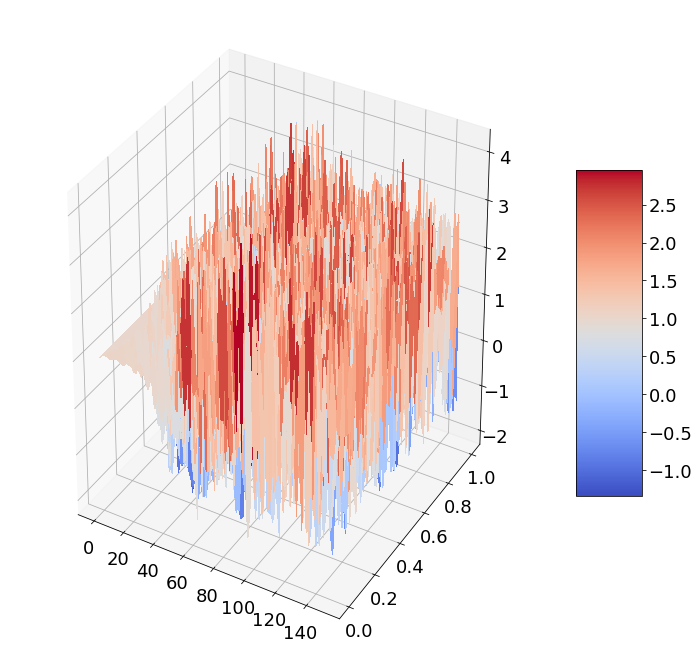

In [36]:
# from https://github.com/E-Renshaw/kuramoto-sivashinsky

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# KSequ.m - solution of Kuramoto-Sivashinsky equation
#
# u_t = -u*u_x - u_xx - u_xxxx, periodic boundary conditions on [0,32*pi]
# computation is based on v = fft(u), so linear term is diagonal
#
# Using this program:
# u is the initial condition
# h is the time step
# N is the number of points calculated along x
# a is the max value in the initial condition
# b is the min value in the initial condition
# x is used when using a periodic boundary condition, to set up in terms of
#   pi
#
# Initial condition and grid setup
N = 1024
x = np.transpose(np.conj(np.arange(1, N+1))) / N
a = -1
b = 1
u = np.cos(x/16)*(1+np.sin(x/16))
v = np.fft.fft(u)
# scalars for ETDRK4
h = 0.25
k = np.transpose(np.conj(np.concatenate((np.arange(0, N/2), np.array([0]), np.arange(-N/2+1, 0))))) / 16
L = k**2 - k**4
E = np.exp(h*L)
E_2 = np.exp(h*L/2)
M = 16
r = np.exp(1j*np.pi*(np.arange(1, M+1)-0.5) / M)
LR = h*np.transpose(np.repeat([L], M, axis=0)) + np.repeat([r], N, axis=0)
Q = h*np.real(np.mean((np.exp(LR/2)-1)/LR, axis=1))
f1 = h*np.real(np.mean((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/LR**3, axis=1))
f2 = h*np.real(np.mean((2+LR+np.exp(LR)*(-2+LR))/LR**3, axis=1))
f3 = h*np.real(np.mean((-4-3*LR-LR**2+np.exp(LR)*(4-LR))/LR**3, axis=1))
# main loop
uu = np.array([u])
tt = 0
tmax = 150
nmax = round(tmax/h)
nplt = int((tmax/100)/h)
g = -0.5j*k
for n in range(1, nmax+1):
    t = n*h
    Nv = g*np.fft.fft(np.real(np.fft.ifft(v))**2)
    a = E_2*v + Q*Nv
    Na = g*np.fft.fft(np.real(np.fft.ifft(a))**2)
    b = E_2*v + Q*Na
    Nb = g*np.fft.fft(np.real(np.fft.ifft(b))**2)
    c = E_2*a + Q*(2*Nb-Nv)
    Nc = g*np.fft.fft(np.real(np.fft.ifft(c))**2)
    v = E*v + Nv*f1 + 2*(Na+Nb)*f2 + Nc*f3
    if n%nplt == 0:
        u = np.real(np.fft.ifft(v))
        uu = np.append(uu, np.array([u]), axis=0)
        tt = np.hstack((tt, t))
# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
tt, x = np.meshgrid(tt, x)
surf = ax.plot_surface(tt, x, uu.transpose(), cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()